<a href="https://colab.research.google.com/github/FraPet/datasharing/blob/master/similarity_con_grafici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/H')

Mounted at /content/H


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
from datetime import datetime
from termcolor import colored
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
nltk.download('omw-1.4')

mesi = {'GEN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAG': '05', 'GIU': '06', 'LUG': '07', 'AGO': '08', 'SET': '09', 'OTT': '10', 'NOV': '11', 'DIC': '12',
        'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def sostituisci_caratteri(parola):
    parola_sostituita = re.sub(r'\B[èé]\B', 'e', parola)
    parola_sostituita = re.sub(r'\B[òó]\B', 'o', parola_sostituita)
    return parola_sostituita


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('italian'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
PATH_PRODUZIONE_STANDARD = '/content/H/Shareddrives/Progetto Talkidz - Dati audio video/studio sentiment/produzione_standard.txt'
# PATH_PRODUZIONE_STANDARD = 'H:\Drive condivisi\Progetto Talkidz - Dati audio video\studio sentiment\produzione_standard_reale.txt'

with open(PATH_PRODUZIONE_STANDARD, 'r', encoding='utf-8') as f:
    testo_standard = f.readlines()
'H:\Drive condivisi\Progetto Talkidz - Dati audio video\studio sentiment\produzione_standard.txt'
# Preprocessing del testo standard
testo_standard_preprocessato = preprocess(testo_standard[0].lower())

word_counts = defaultdict(int)

for token in testo_standard_preprocessato:
    word_counts[token] += 1

word_weights = {word: count for word, count in word_counts.items() if count > 1}
testo_standard_preprocessato = ' '.join(testo_standard_preprocessato)

testo_standard_preprocessato

'bambina dà latte pecora biberon treno passa bambino dorme fuori stelle scatola sotto letto bambina lava denti andare dormire usa spazzolino dentifricio festa torta bambino girotondo coriandoli rana prende sole occhiali foglia pesce tuffa schizza acqua bambina salta pozzanghera gatto scappa paura api cavallo coniglio mangiano coniglio mangia carote cavallo mangia insalata erba mamma fa doccia sapone cuffia dottoressa dà medicina bambino bambino cerotto guancia papà bimbo mangiano papà mangia pizza bimbo mangia panino acqua vino mamma attraversa strisce passeggino bambino piccolo bambino grande guarda semaforo mangia gelato bambina barca saluta bambina bici nonno raccoglie pomodori bambina pettina asino gallina cova pulcino andato spalla contadino bambina dipinge bambino taglia caramelle tavolo bambino va scivolo bambina guarda mangia lecca lecca parco altalena gira pinguino regala sciarpa bambino neve montagne zanzare pungono esce sangue nonna prepara pasta bambino bambino mette uovo f

In [ ]:
PATH_CHAT_CLINICI = '/content/H/Shareddrives/Progetto Talkidz - Dati audio video/studio sentiment/sentiment_chat_clinici'
PATH_CHAT_NORMATIVI = '/content/H/Shareddrives/Progetto Talkidz - Dati audio video/studio sentiment/sentiment_chat_normativi'

In [ ]:
def similarity_da_cartella(PATH_CHAT):
    produzioni_bambini = []
    similarity_lista = []
    nomi = []
    dizionario_generale = {}
    file_chat = os.listdir(PATH_CHAT)
    for filename in file_chat:
        if filename.endswith('.cha'):

            data_nascita, data_test = None, None

            f = open(f'{PATH_CHAT}/{filename}', 'r', encoding='utf-8')
            filename = re.sub('_CHAT_manuale.cha.cha|_TFFD.cha|_phon_CLAN.cha|_CHAT_manuale.cha', '', filename)
            print("Elaboro", colored(filename, "cyan"))
            nomi.append(filename)
            testo = f.readlines()

            lista_dati_anagrafici = [tier for tier in testo if tier.startswith('@')]

            if filename not in dizionario_generale:
                dizionario_generale[filename] = {}

            for frase in lista_dati_anagrafici:
                # ricavo dati del bambino:
                if frase.startswith('@Date'):
                    # dizionario_generale['data test'] = frase.split('\t')[1]
                    data_str = ((frase.split('\t')[1]).strip())
                    date_parts = data_str.split('-')

                    # Converti il mese da stringa a numero
                    month_number = mesi[date_parts[1]]
                    # Crea un oggetto datetime
                    date_obj = int(date_parts[0]),month_number, int(date_parts[2])
                    data_str = "-".join(str(x) for x in date_obj)
                    data_test = datetime.strptime(data_str, "%d-%m-%Y").strftime("%d-%m-%Y")
                    # data = parser.parse(frase.split('\t')[1])
                    # data_test = datetime.strptime(data, '%d-%b-%Y')
                elif frase.startswith('@Birth'):
                    data_str = ((frase.split('\t')[1]).strip())
                    date_parts = data_str.split('-')

                    # Converti il mese da stringa a numero
                    month_number = mesi[date_parts[1]]
                    # Crea un oggetto datetime
                    date_obj = int(date_parts[0]),month_number, int(date_parts[2])
                    data_str = "-".join(str(x) for x in date_obj)
                    data_nascita = datetime.strptime(data_str, "%d-%m-%Y").strftime("%d-%m-%Y")


            data_nascita = datetime.strptime(data_nascita, '%d-%m-%Y')
            data_test = datetime.strptime(data_test, '%d-%m-%Y')
            diff_mes = abs((data_test).year - data_nascita.year) * 12 + (data_test.month - data_nascita.month)

            # calcola la differenza tra le date in anni e mesi
            diff_anni_mes = divmod(diff_mes, 12)
            if diff_mes == 0 or diff_mes <25:
                fascia_talkidz = None
            elif diff_mes <= 42:  # ≤ 3.5 anni = 42 mesi
                fascia_talkidz = "3.6-4.5"
            elif diff_mes >=43  and diff_mes <= 54:  # 3.6-4.5 anni = 43-54 mesi
                fascia_talkidz = "3.6-4.5"
            elif diff_mes >=55 and diff_mes <= 66:  # 4.6-5.5 anni = 55-66 mesi
                fascia_talkidz = "4.6-5.5"
            elif diff_mes >=67 and diff_mes <= 78:  # 5.6-6.5 anni = 67-78 mesi
                fascia_talkidz = "5.6-6.5"
            else:  # ≥ 7.5 anni = 90 mesi
                fascia_talkidz = "5.6-6.5"


            dizionario_generale[filename]['eta_mesi'] = abs(diff_mes)
            dizionario_generale[filename]['fascia_talkidz'] = fascia_talkidz
            testo_CHI = []

            for line in testo:
                if line.startswith('*CHI'):
                    line = line.replace('*CHI:\t', '')
                    line = line.replace('$', 's')
                    line = line.replace('’', "'")
                    line = line.replace(' .', "")
                    line = line.strip()
                    line = re.sub('‹|›|', '', line)
                    line = ' '.join([sostituisci_caratteri(parola) for parola in line.split()])

                    testo_CHI.append(line)

            # Preprocessing del testo

            testo_preprocessato_bambino = []

            for t in testo_CHI:
                tokens = preprocess(t)
                testo_preprocessato_bambino.extend(tokens)

            # Unire i token preprocessati del bambino in una singola stringa
            testo_preprocessato_bambino = ' '.join(testo_preprocessato_bambino)
            produzioni_bambini.append(testo_preprocessato_bambino)
            #%%

            # Calcolare la similarità semantica
            vectorizer = TfidfVectorizer(vocabulary=word_weights.keys(), use_idf=False)

            def similarity(text1, text2):
                vectors = vectorizer.fit_transform([text1, text2])
                return cosine_similarity(vectors)[0, 1]

            # similarita = []

            # Calcolare la similarità semantica tra il testo standard e il testo del bambino
            similarita = similarity(testo_standard_preprocessato, testo_preprocessato_bambino)

            # Stampa il risultato
            similarity_lista.append(similarita)
            dizionario_generale[filename]['similarity score'] = similarita
    return dizionario_generale

In [ ]:
dizionario_generale = similarity_da_cartella(PATH_CHAT_NORMATIVI)
dizionario_generale_clinici = similarity_da_cartella(PATH_CHAT_CLINICI)

print("Normativi", colored(dizionario_generale, "cyan"))

print(len(dizionario_generale.keys()))
print("Clinici", colored(dizionario_generale_clinici, "red"))
print(len(dizionario_generale_clinici.keys()))

df = pd.DataFrame(dizionario_generale).T
df.to_csv(f"similarity_normativi.csv", sep=';')
df_clinici = pd.DataFrame(dizionario_generale_clinici).T
df_clinici.to_csv(f"similarity_clinici.csv", sep=';')

valori_generali = []
valori_fascia1 = []
valori_fascia2 = []
valori_fascia3 = []

valori_generali_clinici = []
valori_clinici1 = []
valori_clinici2 = []
valori_clinici3 = []

nomi_clinici = []
nomi_normativi = []
for soggetto, valori in dizionario_generale.items():
    nomi_normativi.append(soggetto)
    fascia = dizionario_generale[soggetto]['fascia_talkidz']
    sim = dizionario_generale[soggetto]['similarity score']

    valori_generali.append(sim)

for soggetto, valori in dizionario_generale_clinici.items():
    nomi_clinici.append(soggetto)
    fascia = dizionario_generale_clinici[soggetto]['fascia_talkidz']
    sim = dizionario_generale_clinici[soggetto]['similarity score']

    valori_clinici3.append(sim)
    valori_generali_clinici.append(sim)

media_similarity1 = round(np.mean(valori_fascia1),2)
media_similarity2 = round(np.mean(valori_fascia2),2)
media_similarity3 = round(np.mean(valori_fascia3),2)

ds_similarity1 = round(np.std(valori_fascia1),2)
ds_similarity2 = round(np.std(valori_fascia2),2)
ds_similarity3 = round(np.std(valori_fascia3),2)



Elaboro aquiloni_Leo
Elaboro aquiloni_Luca
Elaboro aquiloni_Ruben
Elaboro aquiloni_Tommaso
Elaboro arcobaleni_Gloria_chat_manuale.cha
Elaboro arcobaleni_Irene
Elaboro arcobaleni_Ludovica
Elaboro arcobaleni_Rebecca
Elaboro arcobaleni_Tommaso
Elaboro coccodrilli_Mirko
Elaboro dinosauri_Ilaria
Elaboro palloncini_Alessio
Elaboro palloncini_Rebecca
Elaboro palloncini_virginia
Elaboro palloncini_zoe
Elaboro palloncini_Alice
Elaboro palloncini_Celeste
Elaboro palloncini_Christian
Elaboro tigrotti_Alice
Elaboro turchesi_Giacomo
Elaboro turchesi_Ginevra
Elaboro T
Elaboro SN
Elaboro RG_chat_manuale.cha
Elaboro AD
Elaboro SV
Elaboro KB_chat_manuale.cha
Normativi {'aquiloni_Leo': {'eta_mesi': 73, 'fascia_talkidz': '5.6-6.5', 'similarity score': 0.7810655263271312}, 'aquiloni_Luca': {'eta_mesi': 0, 'fascia_talkidz': None, 'similarity score': 0.9043385433411799}, 'aquiloni_Ruben': {'eta_mesi': 0, 'fascia_talkidz': None, 'similarity score': 0.9528315055463663}, 'aquiloni_Tommaso': {'eta_mesi': 73, 'f

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df_sorted = df.sort_index()
df_sorted

,eta_mesi,fascia_talkidz,similarity score
aquiloni_Leo,73,5.6-6.5,0.781066
aquiloni_Luca,0.0,NaN,0.904339
aquiloni_Ruben,0.0,NaN,0.952832
aquiloni_Tommaso,73,5.6-6.5,0.943895
arcobaleni_Gloria_chat_manuale.cha,70,5.6-6.5,0.897992
arcobaleni_Irene,4.0,NaN,0.891971
arcobaleni_Ludovica,68,5.6-6.5,0.953483
arcobaleni_Rebecca,71,5.6-6.5,0.845806
arcobaleni_Tommaso,73,5.6-6.5,0.916697
coccodrilli_Mirko,69,5.6-6.5,0.93509


In [ ]:
df_clinici = df_clinici.sort_index()
df_clinici

,eta_mesi,fascia_talkidz,similarity score
AD,75,5.6-6.5,0.305982
KB_chat_manuale.cha,78,5.6-6.5,0.882047
RG_chat_manuale.cha,72,5.6-6.5,0.906487
SN,64,4.6-5.5,0.245983
SV,76,5.6-6.5,0.48582
T,77,5.6-6.5,0.94974


In [ ]:
valori_clinici3 = [valore['similarity score'] for valore in dizionario_generale_clinici.values()]
valori_normativi = [valore['similarity score'] for valore in dizionario_generale.values()]
valori_normativi, valori_clinici3

([0.7810655263271312,
  0.9043385433411799,
  0.9528315055463663,
  0.9438949761974805,
  0.89799238583875,
  0.8919713965472778,
  0.9534825566576162,
  0.845806137711101,
  0.9166965677676974,
  0.9350900954607789,
  0.9133462302187035,
  0.9358214918146494,
  0.9110076943199334,
  0.8930065696774493,
  0.9259228634392173,
  0.9028113629787522,
  0.9295766226192537,
  0.9172099572365195,
  0.9325089279629433,
  0.8964098452853705,
  0.9330769647535686],
 [0.9497404514646494,
  0.24598340107303493,
  0.9064866189169732,
  0.3059823206555667,
  0.4858196060187971,
  0.8820465390728403])

21 21 6 6


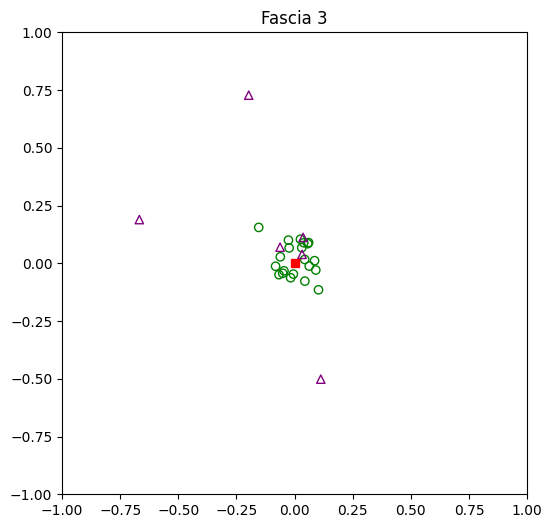

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Puoi sostituire "42" con qualsiasi altro numero intero

def coordinate_punti_grafico(valori_fascia):
    # Calcolo delle coordinate polari dei punti sul grafico a punti
    r = [1 - valore for valore in valori_fascia]
    theta = np.random.uniform(0, 2*np.pi, len(valori_fascia))

    # Conversione delle coordinate polari in coordinate cartesiane
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# Supponendo che valori_fascia3 sia già definito altrove nel programma
x3, y3 = coordinate_punti_grafico(valori_normativi)
clinici_x3, clinici_y3 = coordinate_punti_grafico(valori_clinici3)  # Calcola coordinate per i punteggi clinici
print(len(x3),
      len(y3),
      len(clinici_x3),
      len(clinici_y3))
# Creazione del grafico a punti per solo fascia 3
fig, ax = plt.subplots(figsize=(6, 6))

# Impostazione dei limiti degli assi x e y simmetrici rispetto all'origine
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Impostazione del titolo del grafico
ax.set_title('Fascia 3')

# Aggiunta del valore ideale al centro del grafico a punti
valore_ideale = 1.0
ax.plot([0], [0], 's', color='red')

# Disegno dei punti sul grafico a punti
ax.scatter(x3, y3, facecolors='none', edgecolors='green')
ax.scatter(clinici_x3, clinici_y3, facecolors='none', marker='^', edgecolors='purple')

# Mostra il grafico a punti
plt.savefig("similarity_chart_fascia3.png", dpi=300)

Normativi:  21 [0.7810655263271312, 0.845806137711101, 0.8919713965472778, 0.8930065696774493, 0.8964098452853705, 0.89799238583875, 0.9028113629787522, 0.9043385433411799, 0.9110076943199334, 0.9133462302187035, 0.9166965677676974, 0.9172099572365195, 0.9259228634392173, 0.9295766226192537, 0.9325089279629433, 0.9330769647535686, 0.9350900954607789, 0.9358214918146494, 0.9438949761974805, 0.9528315055463663, 0.9534825566576162]
Clinici:  6 [0.24598340107303493, 0.3059823206555667, 0.4858196060187971, 0.8820465390728403, 0.9064866189169732, 0.9497404514646494]


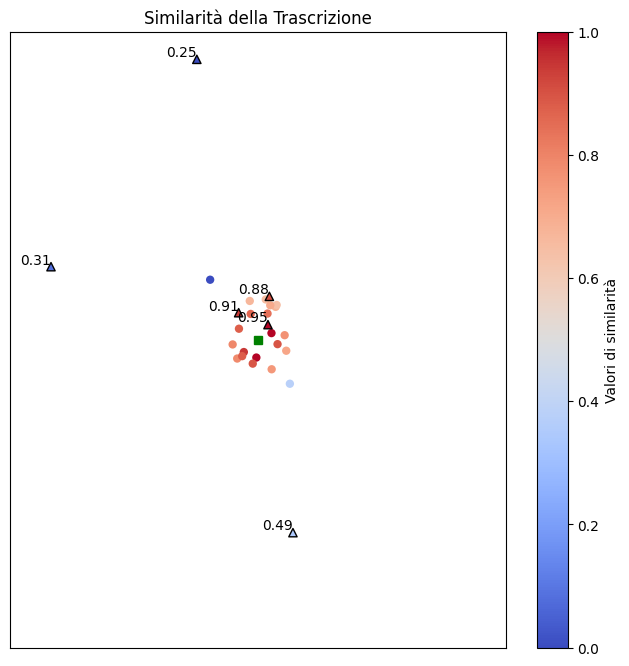

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from random import seed
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.random.seed(42)  # Puoi sostituire "42" con qualsiasi altro numero intero

# Since the code execution state has been reset, we need to redefine the function and variables.
def coordinate_punti_grafico(valori_fascia):
    # Calcolo delle coordinate polari dei punti sul grafico a punti
    r = [1 - valore for valore in valori_fascia]
    theta = np.random.uniform(0, 2*np.pi, len(valori_fascia))

    # Conversione delle coordinate polari in coordinate cartesiane
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

x3, y3 = coordinate_punti_grafico(valori_normativi)
clinici_x3, clinici_y3 = coordinate_punti_grafico(valori_clinici3)

# Impostazione della mappatura dei colori basata sui punteggi di similarità
norm = mcolors.Normalize(vmin=0, vmax=1)  # Assumiamo che i punteggi siano tra 0 e 1
cmap_name = 'coolwarm'
cmap = plt.cm.ScalarMappable(norm=norm, cmap=cmap_name)

# Creazione del grafico
fig, ax = plt.subplots(figsize=(8, 8))

# Impostazione dei limiti degli assi
ax.set_xlim([-.8, .8])
ax.set_ylim([-.8, .8])

# Impostazione del titolo del grafico
ax.set_title('Similarità della Trascrizione')
ax.set_xticks([])
ax.set_yticks([])
# Aggiunta del valore ideale al centro del grafico a punti
ax.plot([0], [0], 's', color='green')  # Quadrato al centro

similarita_normativi = [valore['similarity score'] for valore in dizionario_generale.values()]
similarita_clinici = [valore['similarity score'] for valore in dizionario_generale_clinici.values()]

print("Normativi: ", len(similarita_normativi), sorted(similarita_normativi))
print("Clinici: ", len(similarita_clinici), sorted(similarita_clinici))

# Disegno dei punti sul grafico a punti con colori basati sui punteggi di similarità
scatter = ax.scatter(x3, y3, c=similarita_normativi, cmap=cmap_name, edgecolors='none')
scatter_clinici = ax.scatter(clinici_x3, clinici_y3, c=similarita_clinici, cmap=cmap_name, marker='^', edgecolors='black')

# Add similarity scores as text labels above each point
# for i, score in enumerate(similarita_normativi):
#     ax.text(x3[i], y3[i], f'{score:.2f}', ha='center', va='bottom', fontsize=8)

for i, score in enumerate(similarita_clinici):
    ax.text(clinici_x3[i], clinici_y3[i], f'{score:.2f}', ha='right', va='bottom', fontsize=10, color='black')

# Aggiunta della colorbar
colorbar = fig.colorbar(cmap, ax=ax, orientation='vertical')
colorbar.set_label('Valori di similarità')

# Mostra il grafico a punti
plt.savefig("similarity_heatmap.png", dpi=300)
plt.show()
from google.colab import files
files.download('similarity_heatmap.png')